# Analyzing User Behavior Based on Mobile Device Usage

### Importing The dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
path = '/content/sample_data/user_behavior_dataset.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [ ]:
df.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
528,529,Google Pixel 5,Android,175,3.0,801,32,338,24,Male,2
240,241,Google Pixel 5,Android,45,1.7,302,16,191,57,Female,1
423,424,Xiaomi Mi 11,Android,46,1.1,536,18,167,28,Female,1
470,471,Samsung Galaxy S21,Android,248,4.6,1396,52,883,40,Male,3
529,530,Google Pixel 5,Android,228,4.8,1639,47,796,42,Female,3
249,250,Google Pixel 5,Android,75,1.9,537,13,230,58,Female,1
555,556,Xiaomi Mi 11,Android,201,4.9,1633,41,972,32,Female,3
106,107,Google Pixel 5,Android,152,2.7,642,38,596,55,Male,2
272,273,Google Pixel 5,Android,105,2.2,1002,29,453,31,Female,2
282,283,iPhone 12,iOS,386,7.7,2114,72,1209,51,Male,4


### Performing EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.describe(include='all')

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


In [ ]:
df['User Behavior Class'].value_counts()

,count
User Behavior Class,
2,146
3,143
4,139
5,136
1,136


### Droping Insignificant Columns

Let's drop id and device model columnn from the dataset

In [ ]:
df.drop(['User ID', 'Device Model'], axis=1, inplace=True)

In [ ]:
df.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Android,393,6.4,1872,67,1122,40,Male,4
1,Android,268,4.7,1331,42,944,47,Female,3
2,Android,154,4.0,761,32,322,42,Male,2
3,Android,239,4.8,1676,56,871,20,Male,3
4,iOS,187,4.3,1367,58,988,31,Female,3


### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
df_encoded.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,393,6.4,1872,67,1122,40,4,1.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,3,1.0,0.0,1.0,0.0
2,154,4.0,761,32,322,42,2,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,3,1.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,3,0.0,1.0,1.0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App Usage Time (min/day)    700 non-null    int64  
 1   Screen On Time (hours/day)  700 non-null    float64
 2   Battery Drain (mAh/day)     700 non-null    int64  
 3   Number of Apps Installed    700 non-null    int64  
 4   Data Usage (MB/day)         700 non-null    int64  
 5   Age                         700 non-null    int64  
 6   User Behavior Class         700 non-null    int64  
 7   Operating System_Android    700 non-null    float64
 8   Operating System_iOS        700 non-null    float64
 9   Gender_Female               700 non-null    float64
 10  Gender_Male                 700 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 60.3 KB


### Detecting significant columns

In [ ]:
df_encoded.corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498,-0.031577,0.031577,0.004551,-0.004551
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581,-0.026470,0.026470,-0.003573,0.003573
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587,-0.040361,0.040361,-0.006271,0.006271
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255,-0.038984,0.038984,-0.016245,0.016245
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734,-0.028687,0.028687,-0.023151,0.023151
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563,-0.020358,0.020358,-0.006965,0.006965
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000,-0.041326,0.041326,0.000735,-0.000735
Operating System_Android,-0.031577,-0.026470,-0.040361,-0.038984,-0.028687,-0.020358,-0.041326,1.000000,-1.000000,-0.027589,0.027589
Operating System_iOS,0.031577,0.026470,0.040361,0.038984,0.028687,0.020358,0.041326,-1.000000,1.000000,0.027589,-0.027589
Gender_Female,0.004551,-0.003573,-0.006271,-0.016245,-0.023151,-0.006965,0.000735,-0.027589,0.027589,1.000000,-1.000000


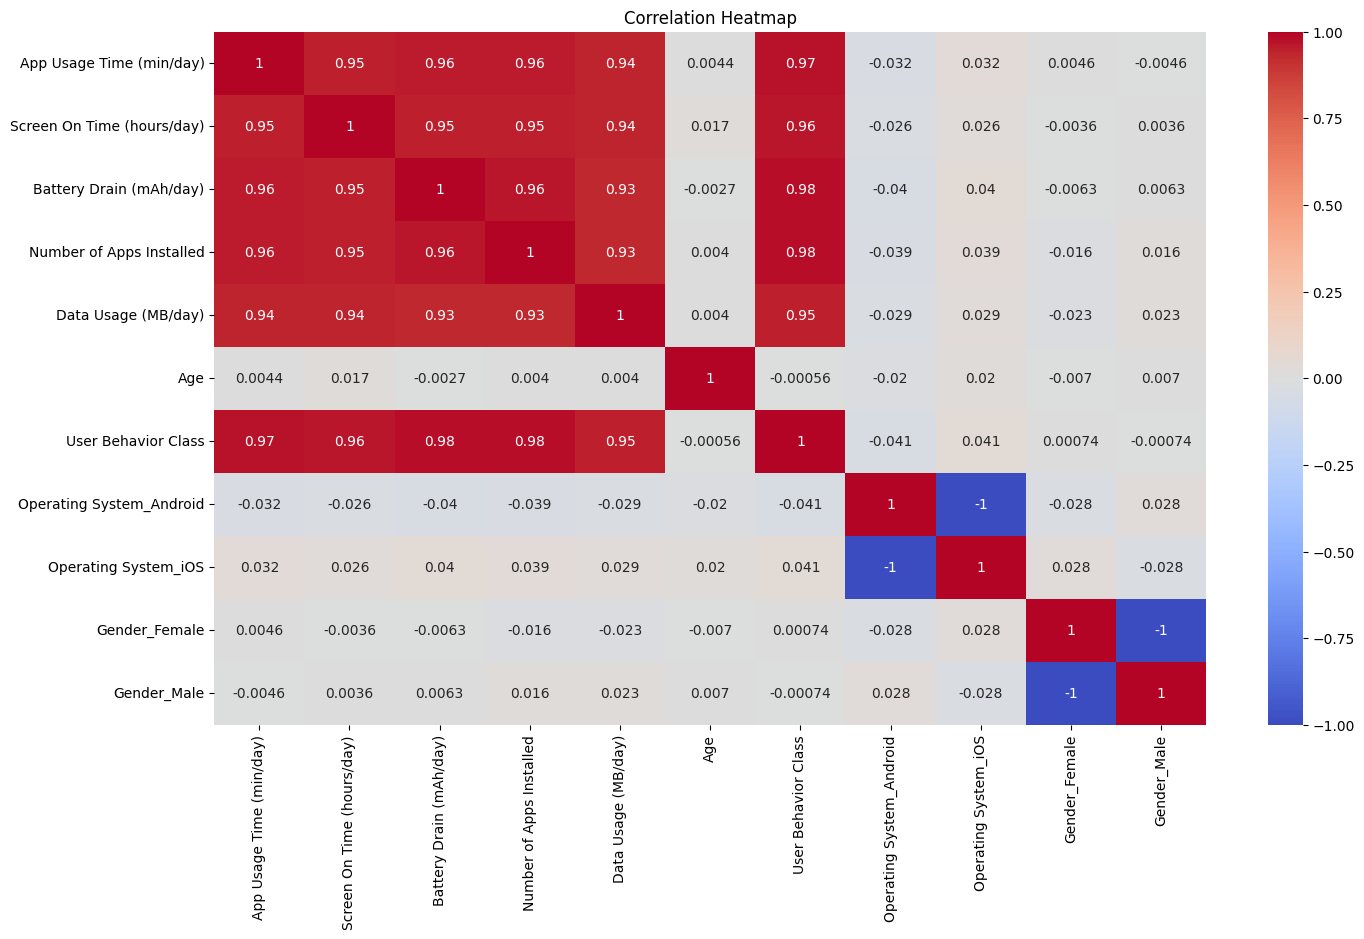

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_encoded.corr(), annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heat map we can see that there's some variable which have lesser impect so we will delete them.

In [ ]:
df_encoded.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,393,6.4,1872,67,1122,40,4,1.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,3,1.0,0.0,1.0,0.0
2,154,4.0,761,32,322,42,2,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,3,1.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,3,0.0,1.0,1.0,0.0


### Droping insignificant columns based on the Heat Map

In [ ]:
df_encoded.drop(['Age', 'Operating System_Android', 'Operating System_iOS', 'Gender_Female', 'Gender_Male'], axis=1, inplace=True)
df_encoded.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),User Behavior Class
0,393,6.4,1872,67,1122,4
1,268,4.7,1331,42,944,3
2,154,4.0,761,32,322,2
3,239,4.8,1676,56,871,3
4,187,4.3,1367,58,988,3


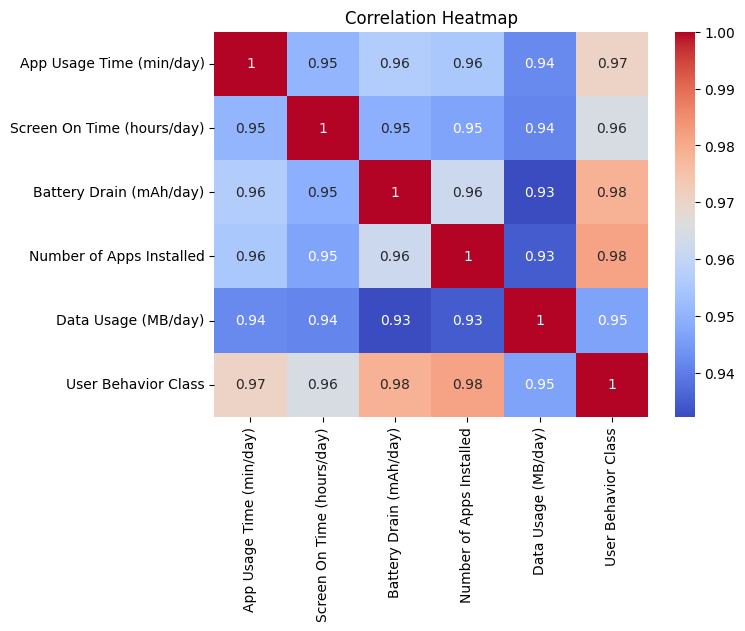

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Plots

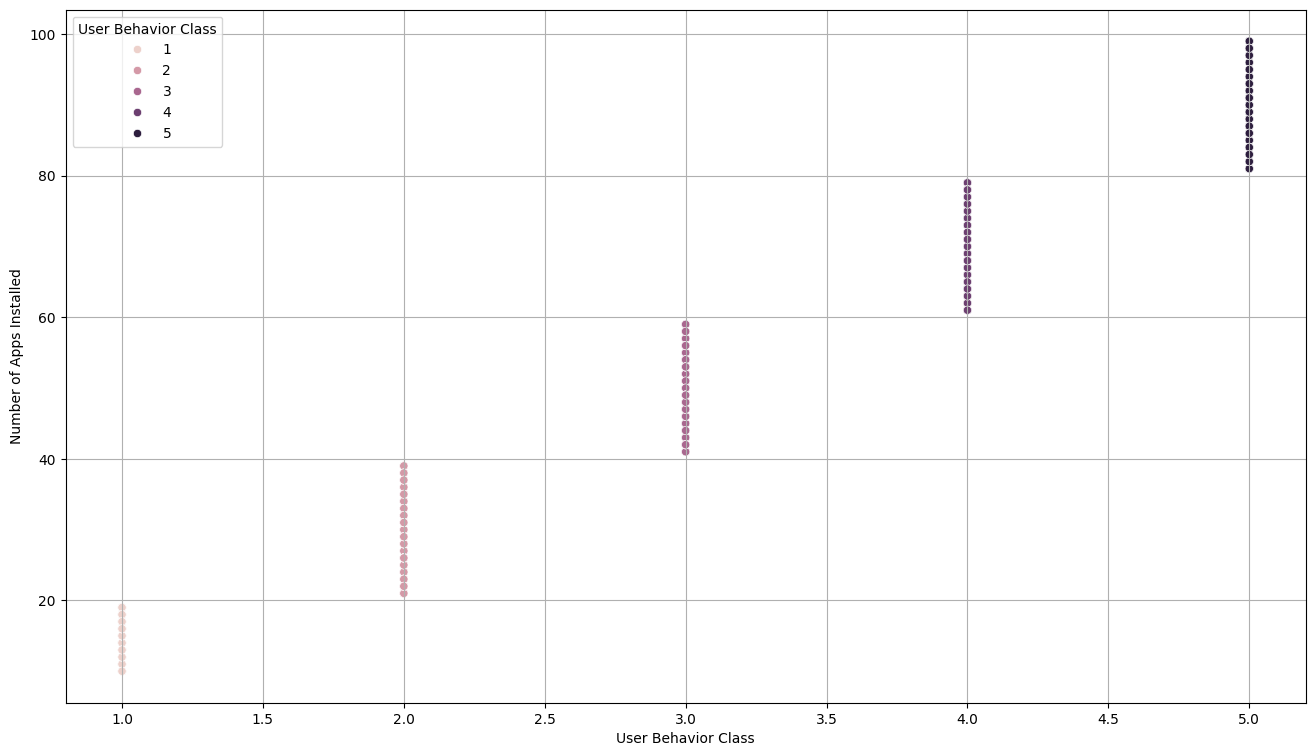

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x = 'User Behavior Class', y = 'Number of Apps Installed',  data = df_encoded, hue = 'User Behavior Class')
plt.grid(True)
plt.show()

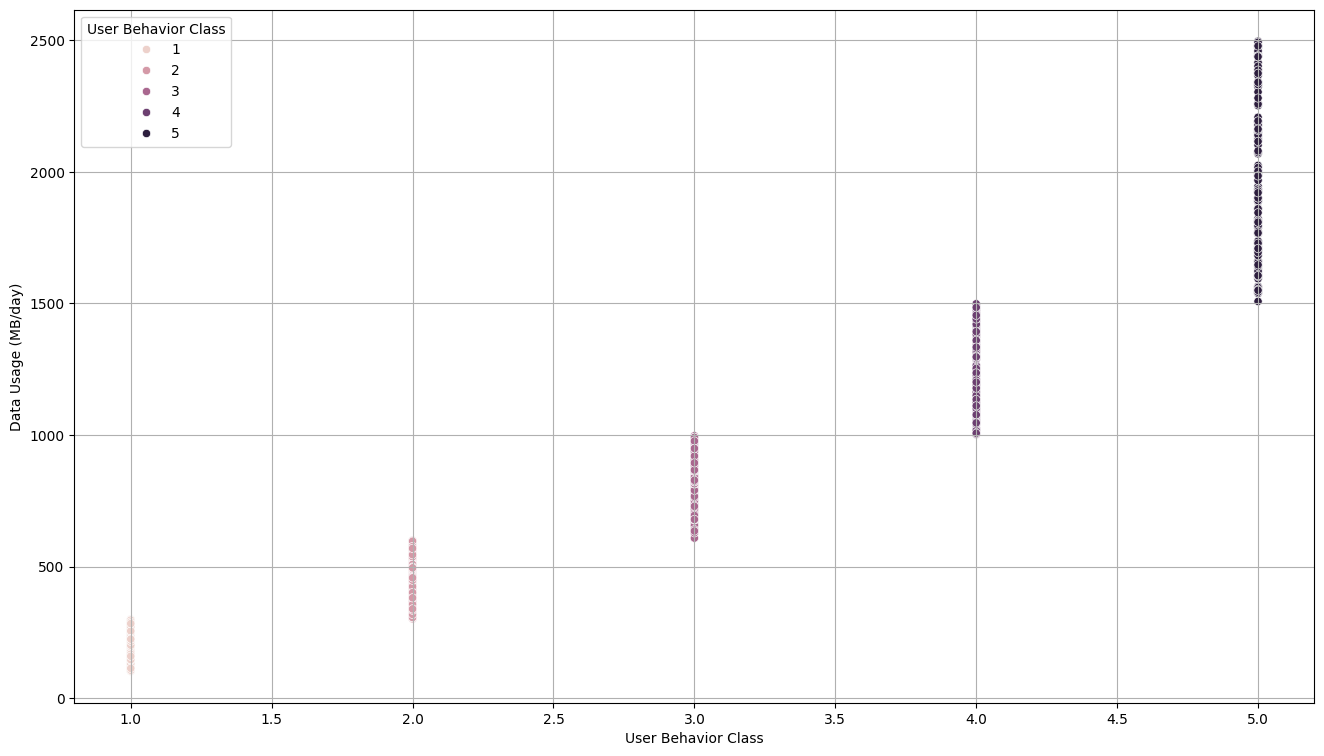

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x = 'User Behavior Class', y = 'Data Usage (MB/day)',  data = df_encoded, hue = 'User Behavior Class')
plt.grid(True)
plt.show()

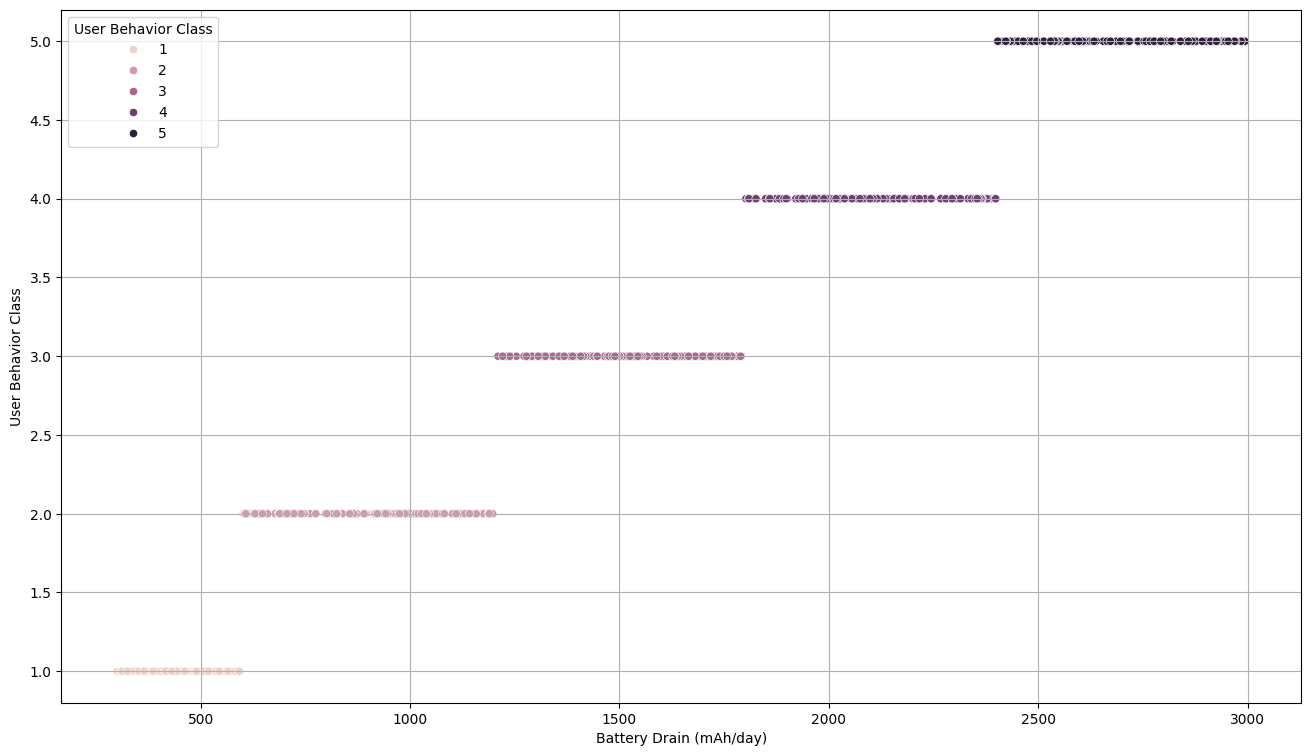

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x = 'Battery Drain (mAh/day)', y = 'User Behavior Class',  data = df_encoded, hue = 'User Behavior Class')
plt.grid(True)
plt.show()

### Train Test Split

In [ ]:
X = df_encoded.drop('User Behavior Class', axis=1)
y = df_encoded['User Behavior Class']


In [ ]:
from sklearn import preprocessing

In [ ]:
X = X.values

In [ ]:
y = y.values

In [ ]:
X[0:5]

array([[ 393. ,    6.4, 1872. ,   67. , 1122. ],
       [ 268. ,    4.7, 1331. ,   42. ,  944. ],
       [ 154. ,    4. ,  761. ,   32. ,  322. ],
       [ 239. ,    4.8, 1676. ,   56. ,  871. ],
       [ 187. ,    4.3, 1367. ,   58. ,  988. ]])

In [ ]:
y[0:5]

array([4, 3, 2, 3, 3])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.6882558 ,  0.36762618,  0.42372605,  0.60609597,  0.30040456],
       [-0.01766827, -0.18677143, -0.23719786, -0.32244114,  0.02227699],
       [-0.66147102, -0.4150528 , -0.93355023, -0.69385599, -0.94960697],
       [-0.18144266, -0.15415981,  0.18427857,  0.19753964, -0.09178656],
       [-0.47510707, -0.31721793, -0.19321771,  0.27182261,  0.09102762]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

So, we need to use number of neighbours to predict the catagory, so we will use a loop and test the accuracy results to determine which one is the best fit. Where the numbers of neighbours would be from 1 to 15.

### Fitting the model and Comparing accuracy scores

In [ ]:
from sklearn import metrics
k = 15
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

for n in range(1, k):
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(std_acc)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print('The Accuracy Score: ', metrics.accuracy_score(y_test, yhat)*100)

The Accuracy Score:  100.0


### Plot of Accuracy Results and Standard Deviation Accuracy Results

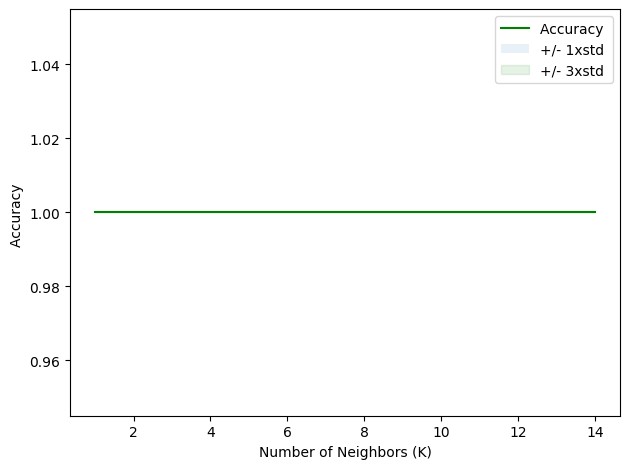

In [ ]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Final Thoughts


On the heat map we have seen that the independent variables are influancing the Dependent variable on a scale of 95% to %98, so even if we use any other algorithm like SVM or K-means, accuracy results will be the same.